# MESA Ecospatial Tutorials (Colorectal Cancer, CODEX)

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.figure import figaspect

import os
os.sys.path.append('../../../')
from mesa import ecospatial as eco

/opt/miniconda3/envs/mesa/lib/python3.11/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/miniconda3/envs/mesa/lib/python3.11/site-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'  # To keep text as editable text in SVGs

## Read Data

In [3]:
data_dir = '/Users/Emrys/Dropbox/spatial_augmentation/data/CRC_related/crc_codex/'
protein = pd.read_csv(os.path.join(data_dir, 'CRC_clusters_neighborhoods_markersV2.csv')) # ~258,000 codex cells
protein = protein[~protein['ClusterName'].str.contains('dirt')]

In [4]:
# Create maps from region to patients/conditions
region_to_patient = dict(zip(protein["File Name"], protein["patients"]))
region_to_condition = dict(zip(protein["File Name"], protein["groups"]))
condition_num2str = {1.0:'CLR', 2.0:'DII'}

## Customise colour palette

In [5]:
from matplotlib import colors as mcolors
from matplotlib import colormaps

In [6]:
cell_names = sorted(protein['ClusterName'].unique().tolist())

In [7]:
tab10 = colormaps['tab10']
tab20b = colormaps['tab20b']
tab20c = colormaps['tab20c']

# Extract specific colors by indexing into the colormap (values from 0 to 1)
# From tab20b: indices 8 to 19
colors_from_tab20b = [tab20b(i) for i in range(8, 20)] + [tab20b(0),tab20b(3),tab20b(4),tab20b(5)]
# From tab20c: indices 0-3, 8-11, and 16-19
colors_from_tab20c = [tab20c(i) for i in range(4)] + [tab20c(i) for i in range(8, 12)] + [tab20c(i) for i in range(16, 20)]


# Combine the colors into a custom palette
custom_palette = colors_from_tab20c + colors_from_tab20b

colors_hex = [mcolors.rgb2hex(color) for color in custom_palette]
color_dict = dict(zip(cell_names, colors_hex))

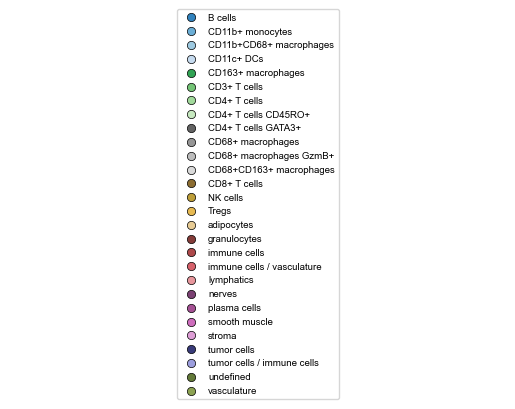

In [8]:
fig, ax = plt.subplots()

for label, color in color_dict.items():
    ax.scatter([], [], c=color, label=label, marker='o',edgecolors='black', linewidths=0.5)

ax.legend(loc='center', ncol=1, fontsize='x-small')
ax.axis('off')
plt.show()

## Selecting the scale for spatial tessellation

In [9]:
# Define the sequence of scales
scales = [2., 4., 8., 16., 24., 32., 48., 64., 72.]
library_ids = protein['File Name'].unique().tolist()

mdi_results = eco.calculate_MDI(spatial_data=protein,
                                scales=scales,
                                library_key='File Name',
                                library_id=library_ids,
                                spatial_key=['X:X','Y:Y'],
                                cluster_key='ClusterName',
                                selecting_scale=True,
                                random_patch=False,
                                plotfigs=False,
                                savefigs=False,
                                patch_kwargs={'max_overlap':0.5,'random_seed': 42, 'min_points':2},
                                other_kwargs={'metric': 'Shannon Diversity'})

Processing region: reg001_A at scale 2.0
0.000 per cent patches are empty
reg001_A at scale 2.0 has 0 patches with zero diveristy
reg001_A at scale 2.0 diversity is 3.006720259484636
Processing region: reg001_B at scale 2.0
0.000 per cent patches are empty
reg001_B at scale 2.0 has 0 patches with zero diveristy
reg001_B at scale 2.0 diversity is 3.0782022986901705
Processing region: reg002_A at scale 2.0
0.000 per cent patches are empty
reg002_A at scale 2.0 has 0 patches with zero diveristy
reg002_A at scale 2.0 diversity is 2.907866052919977
Processing region: reg002_B at scale 2.0
0.000 per cent patches are empty
reg002_B at scale 2.0 has 0 patches with zero diveristy
reg002_B at scale 2.0 diversity is 1.0846680190412177
Processing region: reg003_A at scale 2.0
0.000 per cent patches are empty
reg003_A at scale 2.0 has 0 patches with zero diveristy
reg003_A at scale 2.0 diversity is 2.7898455684853216
Processing region: reg003_B at scale 2.0
0.000 per cent patches are empty
reg003_B

In [10]:
mdi_results['Patients'] = mdi_results.index.map(region_to_patient)
mdi_results['Condition'] = mdi_results.index.map(region_to_condition)
mdi_results

,2.0,4.0,8.0,16.0,24.0,32.0,48.0,64.0,72.0,Slope,Patients,Condition
reg001_A,-0.333333,0.265996,0.145956,0.368778,0.395528,0.408648,0.249583,0.084402,0.021259,-0.050577,1,1
reg001_B,-0.333333,0.046393,0.136096,0.156415,0.142116,0.077049,-0.014528,-0.004171,-0.002126,-0.032809,1,1
reg002_A,-0.333333,0.161656,0.48133,0.653945,0.536351,0.429751,0.200143,0.057148,0.030135,-0.041940,1,1
reg002_B,-0.333333,-0.172175,0.009045,0.141441,0.198274,0.13304,0.062402,0.026924,0.008667,-0.066184,1,1
reg003_A,-0.333333,0.023371,0.468953,0.570232,0.483367,0.304637,0.090609,0.020104,0.016932,-0.039729,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
reg068_B,-0.333333,0.130753,0.35423,0.488595,0.392329,0.245274,0.056565,0.009705,-0.005239,-0.028730,34,1
reg069_A,-0.333333,0.085201,0.055839,0.31447,0.264596,0.200747,0.087016,0.021755,0.020824,-0.047382,35,1
reg069_B,-0.333333,0.142856,0.258559,0.35052,0.28406,0.247712,0.08814,0.043693,0.017784,-0.036851,35,1
reg070_A,-0.333333,0.387595,0.335771,0.498839,0.386674,0.265592,0.071962,0.026927,0.021085,-0.013169,35,1


In [14]:
# Compute averages by every patients
mdi_avg_results = mdi_results.groupby(by="Patients").max().reset_index()
mdi_avg_results 

,Patients,2.0,4.0,8.0,16.0,24.0,32.0,48.0,64.0,72.0,Slope,Condition
0,1,-0.333333,0.265996,0.48133,0.653945,0.536351,0.429751,0.249583,0.084402,0.030135,-0.032809,1
1,2,-0.333333,0.359607,0.468953,0.590012,0.483367,0.304637,0.110694,0.022115,0.018035,-0.004435,2
2,3,-0.333333,0.280703,0.502827,0.581019,0.554904,0.411825,0.173702,0.059353,0.033071,-0.022406,2
3,4,-0.333333,0.452881,0.552124,0.59934,0.596691,0.459507,0.204825,0.067756,0.030451,-0.017915,2
4,5,-0.333333,0.221698,0.531216,0.576677,0.491064,0.353425,0.133,0.030738,0.016664,-0.021299,2
5,6,-0.333333,0.385274,0.570914,0.61025,0.614265,0.506903,0.284822,0.10405,0.054788,-0.010830,1
6,7,-0.333333,0.251205,0.411464,0.530734,0.379842,0.271132,0.099825,0.025405,0.008861,-0.027129,2
7,8,-0.333333,0.548189,0.409619,0.420385,0.366728,0.256045,0.098434,0.038924,0.020294,0.010658,2
8,9,-0.333333,0.560025,0.545334,0.602347,0.572577,0.468931,0.24803,0.09625,0.047036,0.011478,2
9,10,-0.333333,0.375449,0.500484,0.616395,0.55893,0.530189,0.309713,0.12657,0.041742,-0.014243,1


In [17]:
df_melted = pd.melt(mdi_avg_results, id_vars=['Patients', 'Condition'], value_vars=scales, 
                    var_name='Scale', value_name='Diversity Value')
df_melted['sample'] = 'Tissue Sample'
df_melted

,Patients,Condition,Scale,Diversity Value,sample
0,1,1,2.0,-0.333333,Tissue Sample
1,2,2,2.0,-0.333333,Tissue Sample
2,3,2,2.0,-0.333333,Tissue Sample
3,4,2,2.0,-0.333333,Tissue Sample
4,5,2,2.0,-0.333333,Tissue Sample
...,...,...,...,...,...
310,31,2,72.0,0.024634,Tissue Sample
311,32,1,72.0,0.012794,Tissue Sample
312,33,1,72.0,0.036104,Tissue Sample
313,34,1,72.0,0.03282,Tissue Sample


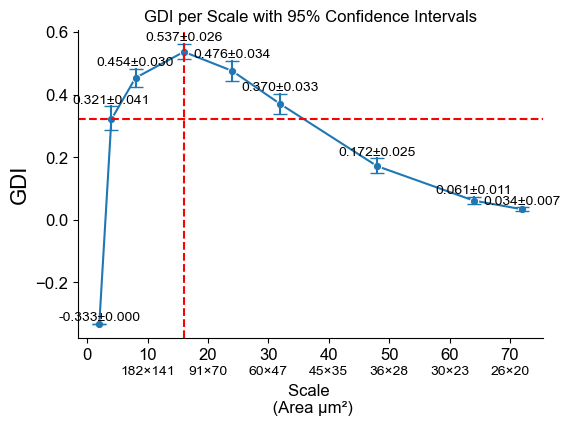

In [18]:
xrange = []
yrange = []
for region in protein['File Name'].unique():
    spatial_value = protein[protein['File Name']==region][['X:X','Y:Y']]
    xrange.append(spatial_value.max(axis=0)['X:X'] - spatial_value.min(axis=0)['X:X'])
    yrange.append(spatial_value.max(axis=0)['Y:Y'] - spatial_value.min(axis=0)['Y:Y'])
mean_xrange = np.mean(xrange)
std_xrange = np.std(xrange)
mean_yrange = np.mean(yrange)
std_yrange = np.std(yrange)

# Calculate mean and confidence interval
grouped = df_melted.groupby('Scale')
mean_values = grouped['Diversity Value'].mean()
conf_intervals = grouped['Diversity Value'].apply(lambda x: stats.sem(x) * stats.t.ppf((1 + 0.95) / 2., len(x)-1))

# Plotting using sns.lineplot
plt.figure(figsize=(6, 4))
ax = sns.lineplot(data=df_melted, 
                  x='Scale', 
                  y='Diversity Value', 
                  style='sample',
                  markers=True,
                  estimator='mean', 
                  err_style='bars', 
                  errorbar=("ci", 95),
                  err_kws={"capsize":5.0}
                 )

# Annotating error bars with their value
for i, (scale, mean, ci) in enumerate(zip(mean_values.index, mean_values, conf_intervals)):
    ax.text(scale, mean + ci, f'{mean:.3f}±{ci:.3f}', color='black', ha='center', va='bottom')

# Drawing red dashed horizontal lines at half the maximum of x and y axes
mean_diversity_per_scale = df_melted.groupby('Scale')['Diversity Value'].mean()
y_sep = mean_diversity_per_scale.median()
x_sep = mean_diversity_per_scale.idxmax()

ax.axhline(y_sep, color='red', linestyle='--')
ax.axvline(x_sep, color='red', linestyle='--')
ax.get_legend().remove()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('', fontsize=0)
plt.xticks(fontsize=12)
plt.ylabel(f"GDI", fontsize=16)
plt.yticks(fontsize=12)

# Add secondary x-axis
xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()][2:-1]
scales = [int(label) for label in xtick_labels if label.strip() != '']
x_sizes = [mean_xrange / scale for scale in scales]
y_sizes = [mean_yrange / scale for scale in scales]
size_labels = [f"{int(x_size)}×{int(y_size)}" for x_size, y_size in zip(x_sizes, y_sizes)]
secax = ax.secondary_xaxis(location=-0.075)
secax.set_xticks(scales)
secax.set_xticklabels(size_labels)
secax.tick_params('x', length=0)
secax.spines['bottom'].set_linewidth(0)
secax.set_xlabel(f'Scale \n (Area μm²)', fontsize=12)

plt.title(f'GDI per Scale with 95% Confidence Intervals')
plt.grid(False)
fig = plt.gcf()
plt.show()

## Perform Ecospatial Analysis on one sample

In [9]:
# Define sample 
sample_id = 'reg021_A'
scale = 32.

# Generate Quardrats
patches_coordinates = eco.generate_patches(spatial_data=protein,
                                           library_key='File Name',
                                           library_id=sample_id,
                                           scaling_factor=scale,
                                           spatial_key=['X:X','Y:Y'])

In [10]:
# Define the sequence of scales
scales = [1., 2., 4., 8., 16., 32.]

df_results = eco.calculate_MDI(spatial_data=protein,
                               scales=scales,
                               library_key='File Name',
                               library_id=[sample_id],
                               spatial_key=['X:X','Y:Y'],
                               cluster_key='ClusterName',
                               selecting_scale=False,
                               random_patch=False,
                               plotfigs=False,
                               savefigs=False,
                               patch_kwargs={'random_seed': None, 'min_points':2},
                               other_kwargs={'metric': 'Shannon Diversity'})

Processing region: reg021_A at scale 1.0
0.000 per cent patches are empty
reg021_A at scale 1.0 has 0 patches with zero diveristy
reg021_A at scale 1.0 diversity is 2.789462693106172
Processing region: reg021_A at scale 2.0
0.000 per cent patches are empty
reg021_A at scale 2.0 has 0 patches with zero diveristy
reg021_A at scale 2.0 diversity is 2.8041743883930996
Processing region: reg021_A at scale 4.0
0.000 per cent patches are empty
reg021_A at scale 4.0 has 0 patches with zero diveristy
reg021_A at scale 4.0 diversity is 2.4923208169420734
Processing region: reg021_A at scale 8.0
6.250 per cent patches are empty
reg021_A at scale 8.0 has 3 patches with zero diveristy
reg021_A at scale 8.0 diversity is 1.9846964659994617
Processing region: reg021_A at scale 16.0
22.656 per cent patches are empty
reg021_A at scale 16.0 has 23 patches with zero diveristy
reg021_A at scale 16.0 diversity is 1.5605304675261158
Processing region: reg021_A at scale 32.0
36.328 per cent patches are empty


In [11]:
print(f"MDI: {df_results.loc[sample_id].values[0]:.3f}")

MDI: 2.789


### Diversity Heatmap Related Analysis

36.328 per cent patches are empty


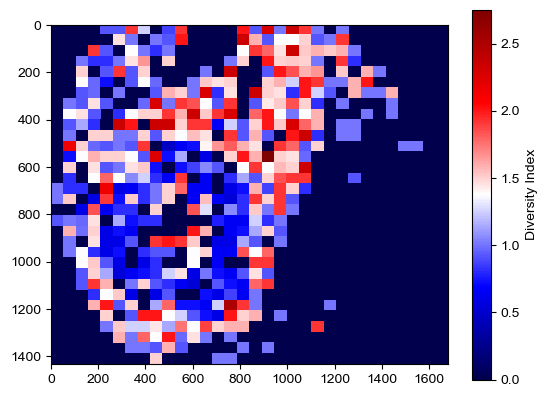

In [12]:
# Caculate Shannon Diversity Index for each quadrat
patch_indices, patches_comp = eco.calculate_diversity_index(spatial_data=protein, 
                                                            library_key='File Name', 
                                                            library_id=sample_id, 
                                                            spatial_key=['X:X','Y:Y'], 
                                                            patches=patches_coordinates, 
                                                            cluster_key='ClusterName', 
                                                            metric='Shannon Diversity', return_comp=True)


# Visualize the diversity indices of quadrats
grid, heatmap_fig = eco.diversity_heatmap(spatial_data=protein,
                                          library_key='File Name', 
                                          library_id=sample_id,
                                          spatial_key=['X:X','Y:Y'],
                                          patches=patches_coordinates, 
                                          heterogeneity_indices=patch_indices,
                                          tissue_only=False,
                                          plot=True,
                                          return_fig=True)

In [13]:
# Calculate GDI 
GDI, p_sim = eco.global_spatial_stats(grid, mode='MoranI', tissue_only=False, plot_weights=False)
print(f"GDI: {GDI:.3f}, p-value: {p_sim:.3f}")

GDI: 0.512, p-value: 0.001


Using MoranI


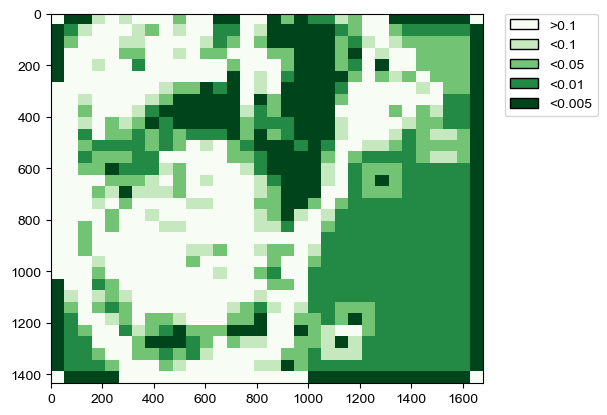

In [14]:
_, _, lisa = eco.local_spatial_stats(grid=grid, 
                                     mode='MoranI', 
                                     tissue_only=False, 
                                     p_value=0.01, 
                                     seed=42, 
                                     plot_weights=False, 
                                     return_stats=True)

heatmap_fig = eco.signif_heatmap(spatial_data=protein,
                                 library_key='File Name', 
                                 library_id=sample_id,
                                 spatial_key=['X:X','Y:Y'],
                                 patches=patches_coordinates, 
                                 heterogeneity_indices=pd.Series(lisa.p_sim),
                                 tissue_only=False,
                                 plot=True,
                                 discrete=True,
                                 return_fig=True)

In [15]:
# Calculate LDI and find hot/coldspots 
hotspots, coldspots = eco.local_spatial_stats(grid, mode='MoranI', p_value=0.05, tissue_only=False)

Using MoranI


width: 1677.000, height: 1434.000


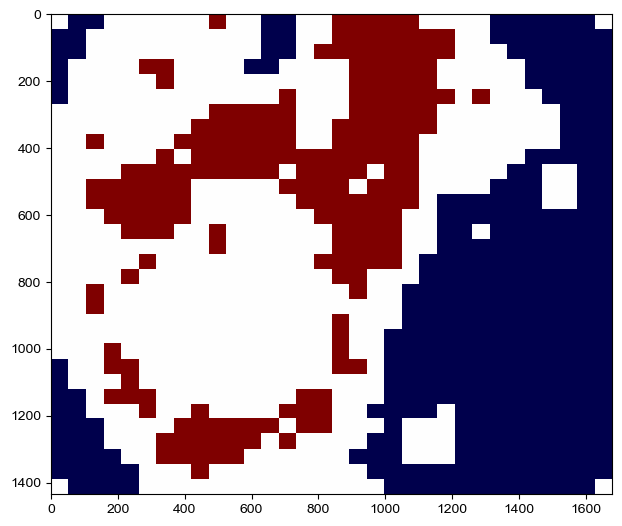

In [16]:
# Visualise hot/coldspots 
combined_spots = (hotspots * 1) + (coldspots * -1)
seismic = plt.cm.seismic
colors = [seismic(0), "white", seismic(0.999)]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_map", colors)

spatial_value = protein[protein['File Name']==sample_id][['X:X', 'Y:Y']]
min_x, min_y = spatial_value.min(axis=0)['X:X'], spatial_value.min(axis=0)['Y:Y']
max_x, max_y = spatial_value.max(axis=0)['X:X'], spatial_value.max(axis=0)['Y:Y']
width = max_x - min_x
height = max_y - min_y
print(f"width: {width:.3f}, height: {height:.3f}")
w, h = figaspect(height/width)

spot_fig = plt.figure(figsize=(w, h))
ax = spot_fig.add_axes([0, 0, 1, 1])

# Create a 2D grid
grid = np.zeros((int(max_y - min_y + 1), int(max_x - min_x + 1)))

# Fill the grid with heterogeneity indices
for patch, diversity_index in enumerate(combined_spots.flatten()):
    x0, y0, x1, y1 = patches_coordinates[patch]
    grid[int(y0-min_y):int(y1-min_y+1), int(x0-min_x):int(x1-min_x+1)] = diversity_index

# Plot the heatmap
ax.imshow(grid, cmap=cmap, interpolation='none', vmin=-1, vmax=1)

In [17]:
# Calculate DPI for hotspots
Hot = True # Set True to investigate hot islands
proximity_I = eco.calculate_DPI(spatial_data=protein, 
                                scale=32.0, 
                                library_key='File Name',
                                library_id=[sample_id], 
                                spatial_key=['X:X', 'Y:Y'],
                                cluster_key='ClusterName',
                                hotspot=Hot,
                                mode='MoranI',
                                p_value=0.01,
                                metric='Shannon Diversity')
print(f"DPI: {proximity_I.loc[sample_id,'DPI']:.3f}")

Processing region: reg021_A at scale 32.0
36.328 per cent patches are empty
Using MoranI
Region reg021_A contains 131 diversity hotspots
11 islands identified
DPI: 80.591


In [18]:
# Visualise Islands composition and similarity
from scipy.spatial.distance import pdist, squareform
labelled_hot, num_hot_islands = eco._utils._label_islands(hotspots, rook=True)
labelled_cold, num_cold_islands = eco._utils._label_islands(coldspots, rook=True)
if Hot:
    print(f"Aggregating hot islands composition")
    filtered_patches_coordinates = [patch for patch, is_hotspot in zip(patches_coordinates, hotspots.flatten()) if is_hotspot]
    filtered_patches_comp = [patch for patch, is_hotspot in zip(patches_comp, hotspots.flatten()) if is_hotspot]
    island_comp = eco._utils.aggregate_spot_compositions(labelled_hot, patches_comp)
else:
    print(f"Aggregating cold islands composition")
    filtered_patches_coordinates = [patch for patch, is_coldspot in zip(patches_coordinates, coldspots.flatten()) if is_coldspot]
    filtered_patches_comp = [patch for patch, is_coldspot in zip(patches_comp, coldspots.flatten()) if is_coldspot]
    island_comp = eco._utils.aggregate_spot_compositions(labelled_cold, patches_comp)
island_comp.head()

Aggregating hot islands composition


,B cells,CD11b+ monocytes,CD11c+ DCs,CD3+ T cells,CD4+ T cells,CD4+ T cells CD45RO+,CD68+ macrophages,CD68+CD163+ macrophages,CD8+ T cells,Tregs,...,granulocytes,immune cells,immune cells / vasculature,plasma cells,smooth muscle,stroma,tumor cells,tumor cells / immune cells,undefined,vasculature
Island_1,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Island_2,189.0,0.0,3.0,5.0,173.0,104.0,1.0,51.0,80.0,2.0,...,5.0,19.0,1.0,19.0,2.0,11.0,42.0,0.0,11.0,14.0
Island_3,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Island_4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Island_5,1.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1677 1434


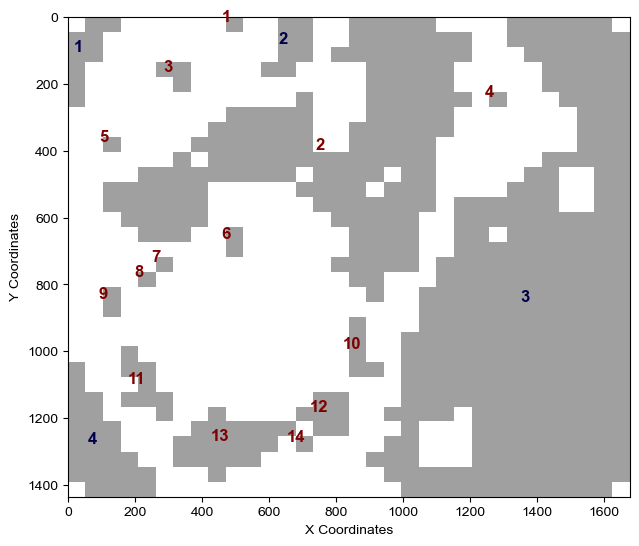

In [44]:
# Visualise labelled islands (hot islands in red; cold islands in blue)
from scipy.ndimage import center_of_mass
combined_spots = (hotspots * 1) + (coldspots * 1) 
seismic = plt.cm.seismic
colors = ['white', 'grey']
cmap = mcolors.LinearSegmentedColormap.from_list("single_color_map", colors)

labelled_hot, num_hot_islands = eco._utils._label_islands(hotspots, rook=True)
labelled_cold, num_cold_islands = eco._utils._label_islands(coldspots, rook=True)
    
min_x, min_y = spatial_value.min(axis=0)['X:X'], spatial_value.min(axis=0)['Y:Y']
max_x, max_y = spatial_value.max(axis=0)['X:X'], spatial_value.max(axis=0)['Y:Y']
width = max_x - min_x
height = max_y - min_y
print(width, height)
w, h = figaspect(height/width)

spot_fig = plt.figure(figsize=(w, h))
ax = spot_fig.add_axes([0, 0, 1, 1])

# Create a 2D grid
grid = np.zeros((int(max_y - min_y + 1), int(max_x - min_x + 1)))

# Fill the grid with diversity indices
for patch, diversity_index in enumerate(combined_spots.flatten()):
    x0, y0, x1, y1 = patches_coordinates[patch]
    grid[int(y0-min_y):int(y1-min_y+1), int(x0-min_x):int(x1-min_x+1)] = diversity_index

# Calculate centroids of hot/cold islands and label them
for label in range(1, num_hot_islands + 1):
    positions = np.where(labelled_hot == label)
    if positions[0].size > 0:
        centroid = center_of_mass(labelled_hot == label)
        ax.text(centroid[1]*width/scale,
                centroid[0]*height/scale, 
                str(label), 
                fontsize=12,
                fontweight='semibold',
                color=seismic(0.999),
                alpha=1.0,
                ha='center', 
                va='center')
        
for label in range(1, num_cold_islands + 1):
    positions = np.where(labelled_cold == label)
    if positions[0].size > 0:
        centroid = center_of_mass(labelled_cold == label)
        ax.text(centroid[1]*width/scale,
                centroid[0]*height/scale,  
                str(label), 
                fontsize=12,
                fontweight='semibold',
                color=seismic(0),
                alpha=1.0,
                ha='center', 
                va='center')

plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
ax.imshow(grid, cmap=cmap, alpha=0.75, interpolation='none', vmin=0, vmax=1)

In [41]:
9.0*width/scale

471.65625

In [27]:
label

4

In [38]:
center_of_mass(labelled_hot == 1)

(0.0, 9.0)

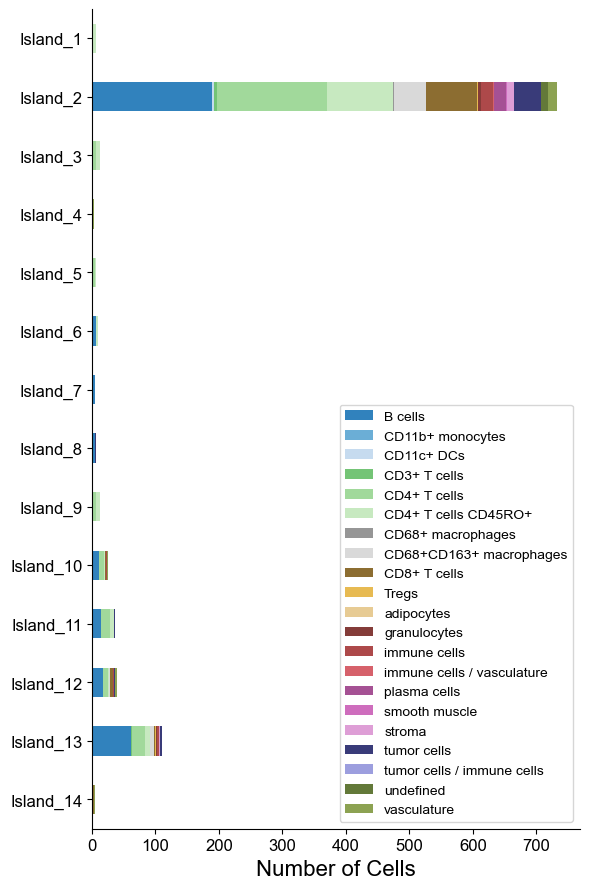

In [20]:
colors = [color_dict[col] for col in island_comp.columns]
ax = island_comp.plot(kind='barh', stacked=True, color=colors, figsize=(6,9))

# Set plot title, axis labels, and legend
plt.title('', fontsize=16)
plt.xlabel('Number of Cells', fontsize=16)
plt.ylabel('')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

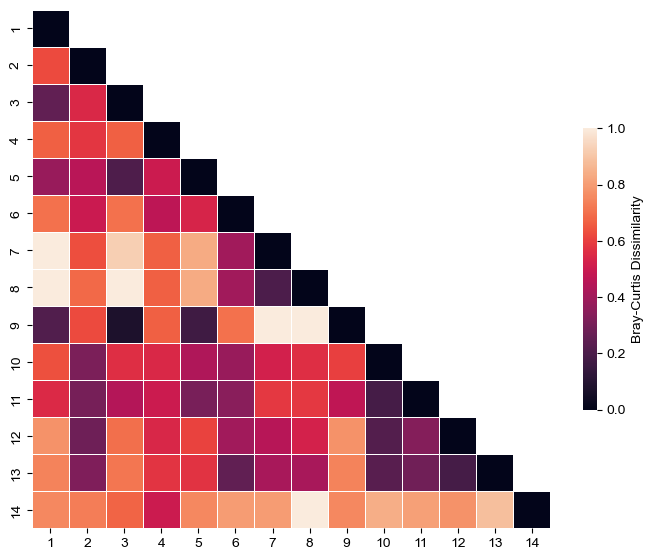

In [21]:
island_comp = island_comp.div(island_comp.sum(axis=1), axis=0)
island_comp_filled = island_comp.fillna(0)

# Calculate Bray-Curtis distance
distances = pdist(island_comp_filled.values, metric='braycurtis')

# Convert the condensed distance matrix to a square matrix
distance_matrix = squareform(distances)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(distance_matrix, dtype=bool),k=1)

plt.figure(figsize=(7, 6))
axis_labels = np.arange(1, len(distance_matrix)+1)
sns.heatmap(distance_matrix, 
            mask=mask, 
            cmap='rocket', 
            vmin=0.0,
            vmax=1.0, 
            annot=False, 
            square=True, 
            linewidths=.5, 
            xticklabels=axis_labels, 
            yticklabels=axis_labels,
            cbar_kws={"shrink": .5, "label": "Bray-Curtis Dissimilarity"})

plt.title('')
plt.tight_layout()
plt.show()

## Perform Ecospatial Analysis on all samples

In [9]:
library_ids = protein['File Name'].unique().tolist()

### Calculate MDI

In [10]:
# Define the sequence of scales
scales = [1., 2., 4., 8., 16., 32.]

mdi_results = eco.calculate_MDI(spatial_data=protein,
                               scales=scales,
                               library_key='File Name',
                               library_id=library_ids,
                               spatial_key=['X:X','Y:Y'],
                               cluster_key='ClusterName',
                               selecting_scale=False,
                               random_patch=False,
                               plotfigs=False,
                               savefigs=False,
                               patch_kwargs={'random_seed': None, 'min_points':2},
                               other_kwargs={'metric': 'Shannon Diversity'})

Processing region: reg001_A at scale 1.0
0.000 per cent patches are empty
reg001_A at scale 1.0 has 0 patches with zero diveristy
reg001_A at scale 1.0 diversity is 3.3164164900586974
Processing region: reg001_B at scale 1.0
0.000 per cent patches are empty
reg001_B at scale 1.0 has 0 patches with zero diveristy
reg001_B at scale 1.0 diversity is 3.354147234904591
Processing region: reg002_A at scale 1.0
0.000 per cent patches are empty
reg002_A at scale 1.0 has 0 patches with zero diveristy
reg002_A at scale 1.0 diversity is 3.151848682137609
Processing region: reg002_B at scale 1.0
0.000 per cent patches are empty
reg002_B at scale 1.0 has 0 patches with zero diveristy
reg002_B at scale 1.0 diversity is 1.1192231346242458
Processing region: reg003_A at scale 1.0
0.000 per cent patches are empty
reg003_A at scale 1.0 has 0 patches with zero diveristy
reg003_A at scale 1.0 diversity is 3.0403492069039224
Processing region: reg003_B at scale 1.0
0.000 per cent patches are empty
reg003_B

In [11]:
mdi_results['Patients'] = mdi_results.index.map(region_to_patient)
mdi_results['Condition'] = mdi_results.index.map(region_to_condition)
mdi_results

,1.0,2.0,4.0,8.0,16.0,32.0,Slope,Patients,Condition
reg001_A,3.316416,3.00672,2.691226,2.184427,1.278679,0.555722,0.556983,1,1
reg001_B,3.354147,3.078202,2.508512,1.397887,0.624072,0.238475,0.687182,1,1
reg002_A,3.151849,2.907866,2.576381,2.168661,1.497099,0.699458,0.482914,1,1
reg002_B,1.119223,1.084668,1.009291,0.858962,0.620206,0.315621,0.158906,1,1
reg003_A,3.040349,2.789846,2.402995,1.966016,1.441875,0.657805,0.468389,2,2
...,...,...,...,...,...,...,...,...,...
reg068_B,3.656726,3.37063,3.051267,2.541294,1.717963,0.621128,0.589885,34,1
reg069_A,3.205998,3.053596,2.835891,2.338134,1.565374,0.591479,0.515286,35,1
reg069_B,3.553295,3.034952,2.560528,1.931253,1.011691,0.369497,0.646230,35,1
reg070_A,2.541924,2.31133,2.142624,1.737921,1.268428,0.556278,0.384618,35,1


### Calculate GDI

In [44]:
gdi_results = eco.calculate_GDI(spatial_data=protein, 
                                scale=32.0, 
                                library_key='File Name',
                                library_id=library_ids, 
                                spatial_key=['X:X','Y:Y'],
                                cluster_key='ClusterName',
                                hotspot=True,
                                restricted=False,
                                metric='Shannon Diversity')
gdi_results

Processing region: reg001_A at scale 32.0
46.582 per cent patches are empty
Processing region: reg001_B at scale 32.0
75.293 per cent patches are empty
Processing region: reg002_A at scale 32.0
45.996 per cent patches are empty
Processing region: reg002_B at scale 32.0
19.238 per cent patches are empty
Processing region: reg003_A at scale 32.0
46.875 per cent patches are empty
Processing region: reg003_B at scale 32.0
43.945 per cent patches are empty
Processing region: reg004_A at scale 32.0
35.254 per cent patches are empty
Processing region: reg004_B at scale 32.0
17.871 per cent patches are empty
Processing region: reg005_A at scale 32.0
18.359 per cent patches are empty
Processing region: reg005_B at scale 32.0
40.527 per cent patches are empty
Processing region: reg006_A at scale 32.0
37.402 per cent patches are empty
Processing region: reg006_B at scale 32.0
23.828 per cent patches are empty
Processing region: reg007_A at scale 32.0
17.188 per cent patches are empty
Processing r

,GDI
reg001_A,0.408648
reg001_B,0.077049
reg002_A,0.429751
reg002_B,0.133040
reg003_A,0.304637
...,...
reg068_B,0.245274
reg069_A,0.200747
reg069_B,0.247712
reg070_A,0.265592


### Calculate DPI

In [45]:
# Calculate DPI for hotspots
dpi_results = eco.calculate_DPI(spatial_data=protein, 
                                scale=32.0, 
                                library_key='File Name',
                                library_id=library_ids, 
                                spatial_key=['X:X','Y:Y'],
                                cluster_key='ClusterName',
                                hotspot=True,
                                metric='Shannon Diversity')
dpi_results

Processing region: reg001_A at scale 32.0
46.582 per cent patches are empty
Using MoranI
Region reg001_A contains 92 diversity hotspots
2 islands identified
Processing region: reg001_B at scale 32.0
75.293 per cent patches are empty
Using MoranI
Region reg001_B contains 5 diversity hotspots
4 islands identified
Processing region: reg002_A at scale 32.0
45.996 per cent patches are empty
Using MoranI
Region reg002_A contains 115 diversity hotspots
8 islands identified
Processing region: reg002_B at scale 32.0
19.238 per cent patches are empty
Using MoranI
Region reg002_B contains 19 diversity hotspots
7 islands identified
Processing region: reg003_A at scale 32.0
46.875 per cent patches are empty
Using MoranI
Region reg003_A contains 53 diversity hotspots
10 islands identified
Processing region: reg003_B at scale 32.0
43.945 per cent patches are empty
Using MoranI
Region reg003_B contains 60 diversity hotspots
7 islands identified
Processing region: reg004_A at scale 32.0
35.254 per cent

,DPI
reg001_A,65.053824
reg001_B,2.878179
reg002_A,71.058135
reg002_B,2.891396
reg003_A,25.809464
...,...
reg068_B,45.784271
reg069_A,31.319700
reg069_B,23.723016
reg070_A,27.607388


### Calculate Global Cell Frequency & Cell Co-Occurrence

In [10]:
global_cellfreq_df, global_co_occurrence_df = eco.spot_cellfreq(spatial_data=protein, 
                                                                scale=32.0, 
                                                                library_key='File Name',
                                                                library_id=library_ids, 
                                                                spatial_key=['X:X','Y:Y'],
                                                                cluster_key='ClusterName',
                                                                spots='global',
                                                                p_value=0.05,
                                                                top=None,
                                                                selected_comb=None,
                                                                restricted=False,
                                                                metric='Shannon Diversity')

Processing region: reg001_A at scale 32.0
46.582 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: reg001_B at scale 32.0
75.293 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: reg002_A at scale 32.0
45.996 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: reg002_B at scale 32.0
19.238 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: reg003_A at scale 32.0
46.875 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: reg003_B at scale 32.0
43.945 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: reg004_A at scale 32.0
35.254 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: reg004_B at scale 32.0
17.871 per cent patches are empty
Using MoranI
Considering whole tissue
Processing region: reg005_A at scale 32.0
18.359 per cent patches are empty
Using MoranI

In [11]:
global_cellfreq_df['Patients'] = global_cellfreq_df.index.map(region_to_patient)
global_cellfreq_df['Condition'] = global_cellfreq_df.index.map(region_to_condition)

global_co_occurrence_subcols = global_co_occurrence_df.loc[:,global_co_occurrence_df.mean()>0.01].columns.tolist()
global_co_occurrence_df['Condition'] = global_co_occurrence_df.index.map(region_to_condition)
global_co_occurrence_df['Patients'] = global_co_occurrence_df.index.map(region_to_patient)
global_co_occurrence_subcols.extend([('Condition',''),('Patients','')])

In [14]:
# Compute averages by every patients
global_cellfreq_df_avg = global_cellfreq_df.groupby(by="Patients").mean().reset_index()

In [15]:
# Melt the dataframe for easier plotting and statistical analysis
global_cellfreq_df_melt = global_cellfreq_df_avg.melt(id_vars=['Patients', 'Condition'])
global_cellfreq_df_melt.columns = ['Patients', 'Condition', 'ClusterName', 'Frequency']
global_cellfreq_df_melt['Condition'] = global_cellfreq_df_melt['Condition'].map(condition_num2str)
global_cellfreq_df_melt

,Patients,Condition,ClusterName,Frequency
0,1,CLR,B cells,0.028638
1,2,DII,B cells,0.020368
2,3,DII,B cells,0.014561
3,4,DII,B cells,0.002585
4,5,DII,B cells,0.019890
...,...,...,...,...
975,31,DII,vasculature,0.073614
976,32,CLR,vasculature,0.011795
977,33,CLR,vasculature,0.041157
978,34,CLR,vasculature,0.071935


B cells has p value of 0.003800830542975529
CD11b+ monocytes has p value of 0.2641241005069516
CD11b+CD68+ macrophages has p value of 0.10925741826128363
CD11c+ DCs has p value of 0.7985564929462324
CD163+ macrophages has p value of 0.2374412634569714
CD3+ T cells has p value of 0.4237759212663951
CD4+ T cells has p value of 0.11901416710873343
CD4+ T cells CD45RO+ has p value of 0.7051704980689707
CD4+ T cells GATA3+ has p value of 0.2679919848799888
CD68+ macrophages has p value of 0.037611781498744286
CD68+ macrophages GzmB+ has p value of 0.2893131441638549
CD68+CD163+ macrophages has p value of 0.15990783277966897
CD8+ T cells has p value of 0.19121534903649534
NK cells has p value of 0.3059893418832312
Tregs has p value of 0.028286994353345356
adipocytes has p value of 0.03776143473828342
granulocytes has p value of 0.03104681328507294
immune cells has p value of 0.05700202991081446
immune cells / vasculature has p value of 0.22678875447912733
lymphatics has p value of 0.15303765

/opt/miniconda3/envs/mesa/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


B cells has p value = 0.106
CD11b+ monocytes has p value = 0.469
CD11b+CD68+ macrophages has p value = 0.417
CD11c+ DCs has p value = 0.832
CD163+ macrophages has p value = 0.469
CD3+ T cells has p value = 0.593
CD4+ T cells has p value = 0.417
CD4+ T cells CD45RO+ has p value = 0.823
CD4+ T cells GATA3+ has p value = 0.469
CD68+ macrophages has p value = 0.211
CD68+ macrophages GzmB+ has p value = 0.476
CD68+CD163+ macrophages has p value = 0.446
CD8+ T cells has p value = 0.446
NK cells has p value = 0.476
Tregs has p value = 0.211
adipocytes has p value = 0.211
granulocytes has p value = 0.211
immune cells has p value = 0.266
immune cells / vasculature has p value = 0.469
lymphatics has p value = 0.446
nerves has p value = 0.916
plasma cells has p value = 0.684
smooth muscle has p value = 0.832
stroma has p value = 0.593
tumor cells has p value = 0.715
tumor cells / immune cells has p value = 0.709
undefined has p value = 0.832
vasculature has p value = 0.446


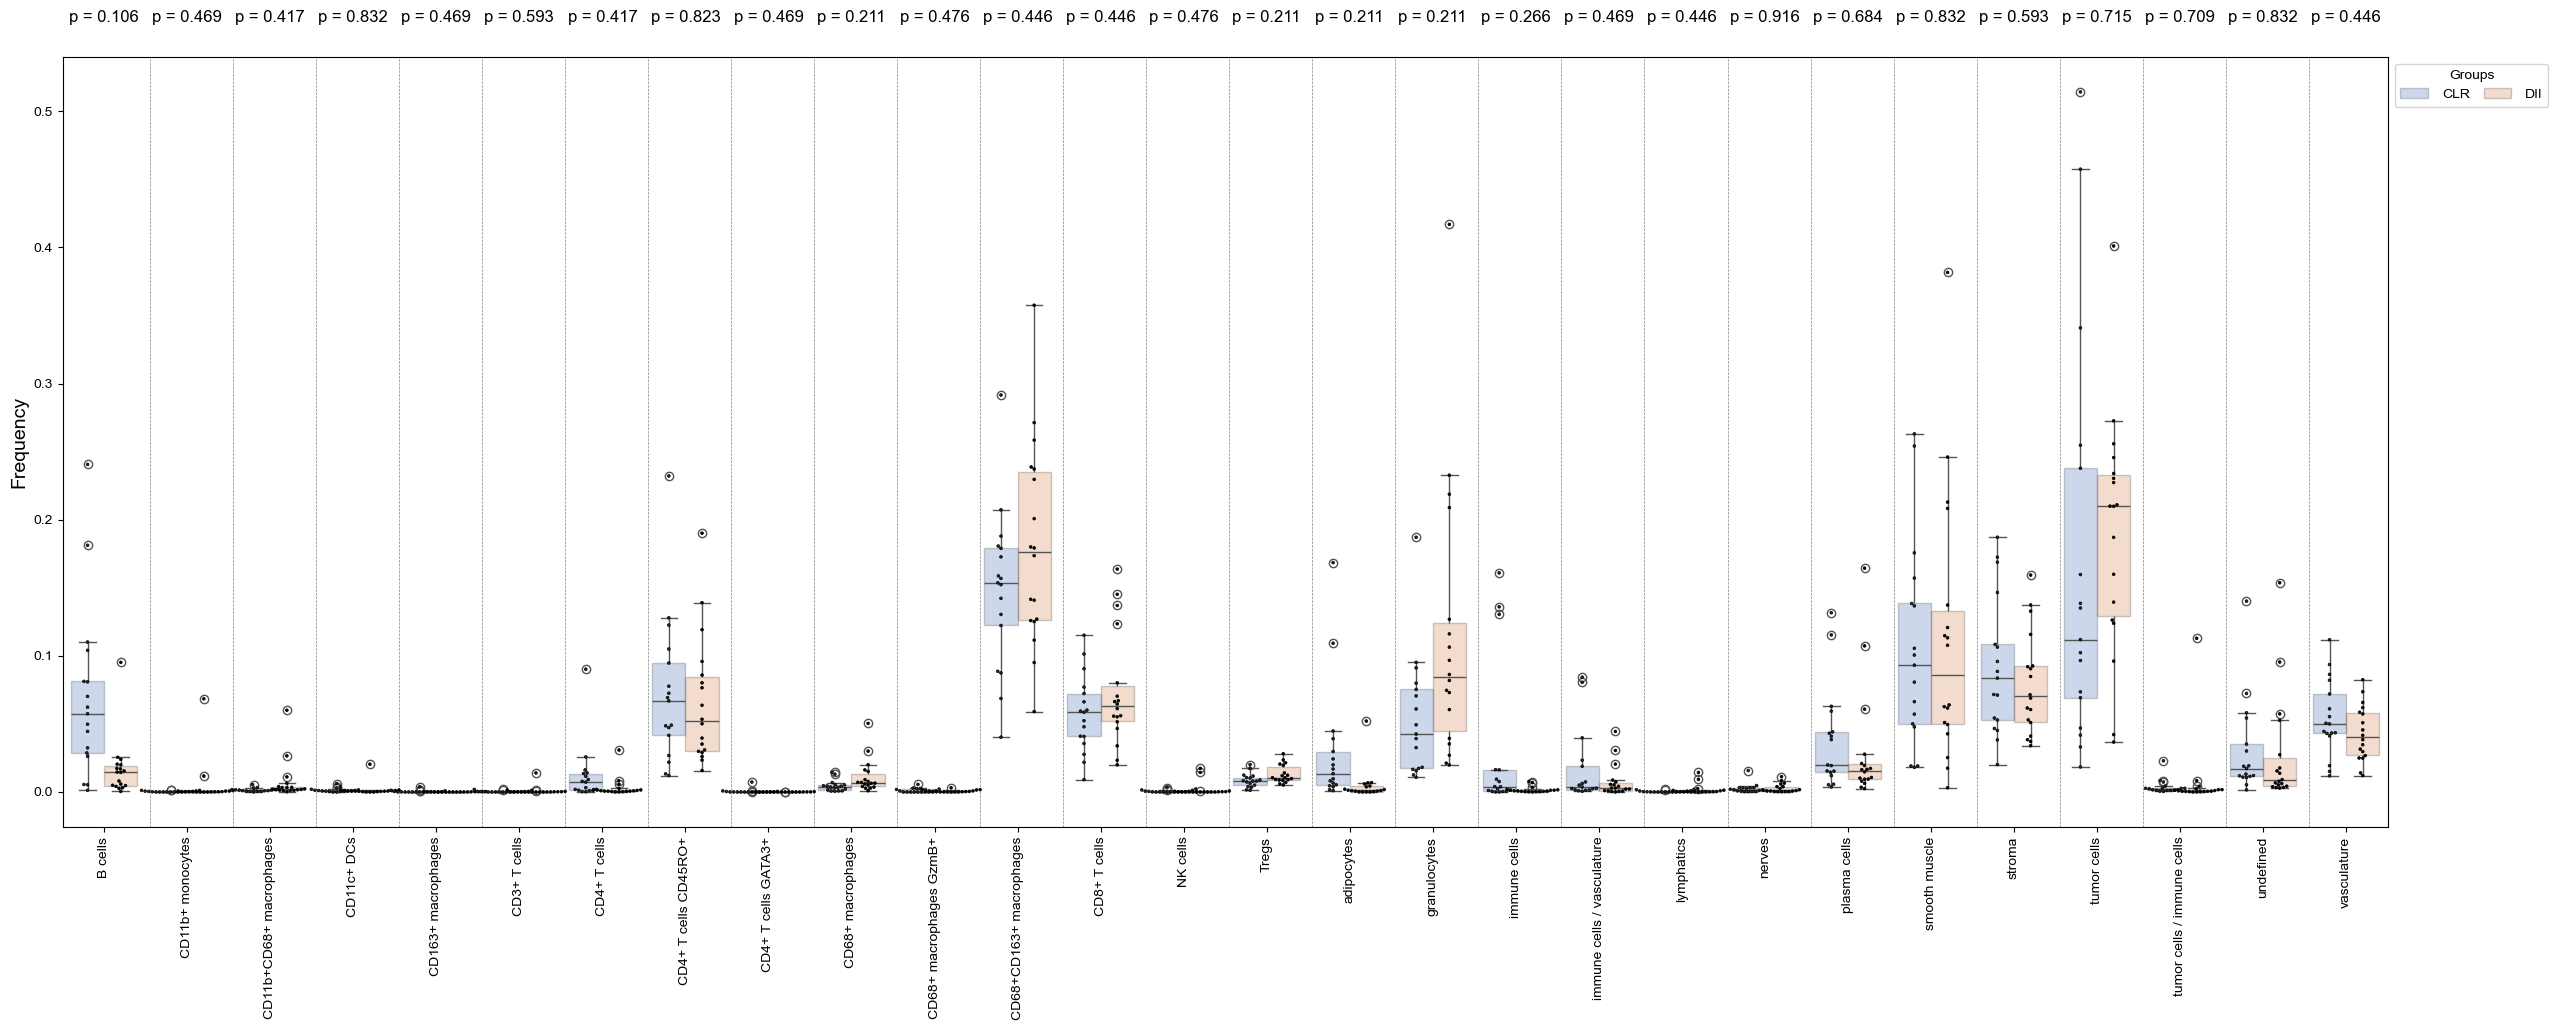

In [16]:
# Perform t-tests
selected_cell_types = sorted(protein['ClusterName'].unique())
selected_p_values = []
for ct in selected_cell_types:
    group1 = global_cellfreq_df_melt[(global_cellfreq_df_melt['ClusterName'] == ct) & (global_cellfreq_df_melt['Condition'] == 'CLR')]['Frequency']
    group2 = global_cellfreq_df_melt[(global_cellfreq_df_melt['ClusterName'] == ct) & (global_cellfreq_df_melt['Condition'] == 'DII')]['Frequency']
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value of {p_value}")
    selected_p_values.append(p_value)

pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')
print('-'*42)
print(f"p-values after correction:")

# Plot
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=global_cellfreq_df_melt, x='ClusterName', y='Frequency', hue='Condition', palette='muted', boxprops=dict(alpha=.3), ax=ax, dodge=True, order=selected_cell_types)
sns.swarmplot(data=global_cellfreq_df_melt, x='ClusterName', y='Frequency', hue='Condition', palette='dark:black', size=2.0, dodge=True, order=selected_cell_types, ax=ax, edgecolor='auto', linewidth=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)
plt.xticks(rotation=90)

p_vals_corrected_dict = {}
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=12, rotation=0)
    print(f"{ct} has p value = {pvals_corrected[i]:.3f}", flush=True)
    p_vals_corrected_dict[ct] = pvals_corrected[i]
    
for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)
    
ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('') 
plt.show()

### Calculate Cell Frequency and Cell Co-Occurrence in hot/coldspots

In [17]:
spot_cellfreq_df, spot_co_occurrence_df = eco.spot_cellfreq(spatial_data=protein, 
                                                            scale=32.0, 
                                                            library_key='File Name',
                                                            library_id=library_ids, 
                                                            spatial_key=['X:X','Y:Y'],
                                                            cluster_key='ClusterName',
                                                            spots='hot',
                                                            p_value=0.05,
                                                            top=None,
                                                            selected_comb=None,
                                                            restricted=False,
                                                            metric='Shannon Diversity')

Processing region: reg001_A at scale 32.0
46.582 per cent patches are empty
Using MoranI
Region reg001_A contains 104 diversity hotspots
Processing region: reg001_B at scale 32.0
75.293 per cent patches are empty
Using MoranI
Region reg001_B contains 11 diversity hotspots
Processing region: reg002_A at scale 32.0
45.996 per cent patches are empty
Using MoranI
Region reg002_A contains 167 diversity hotspots
Processing region: reg002_B at scale 32.0
19.238 per cent patches are empty
Using MoranI
Region reg002_B contains 48 diversity hotspots
Processing region: reg003_A at scale 32.0
46.875 per cent patches are empty
Using MoranI
Region reg003_A contains 123 diversity hotspots
Processing region: reg003_B at scale 32.0
43.945 per cent patches are empty
Using MoranI
Region reg003_B contains 93 diversity hotspots
Processing region: reg004_A at scale 32.0
35.254 per cent patches are empty
Using MoranI
Region reg004_A contains 84 diversity hotspots
Processing region: reg004_B at scale 32.0
17.

In [18]:
spot_cellfreq_df['Patients'] = spot_cellfreq_df.index.map(region_to_patient)
spot_cellfreq_df['Condition'] = spot_cellfreq_df.index.map(region_to_condition)

spot_co_occurrence_subcols = spot_co_occurrence_df.loc[:,spot_co_occurrence_df.mean()>0.01].columns.tolist()
spot_co_occurrence_df['Condition'] = spot_co_occurrence_df.index.map(region_to_condition)
spot_co_occurrence_df['Patients'] = spot_co_occurrence_df.index.map(region_to_patient)
spot_co_occurrence_subcols.extend([('Condition',''),('Patients','')])

In [19]:
len(spot_co_occurrence_df.columns)

305

In [20]:
len(spot_co_occurrence_subcols)

64

In [21]:
len(spot_co_occurrence_subcols)

64

In [ ]:
# Compute averages by every patients
spot_cellfreq_df_avg = spot_cellfreq_df.groupby(by="Patients").mean().reset_index()

In [23]:
# Melt the dataframe for easier plotting and statistical analysis
spot_cellfreq_df_melt = spot_cellfreq_df_avg.melt(id_vars=['Patients', 'Condition'])
spot_cellfreq_df_melt.columns = ['Patients', 'Condition', 'ClusterName', 'Frequency']
spot_cellfreq_df_melt['Condition'] = spot_cellfreq_df_melt['Condition'].map(condition_num2str)
spot_cellfreq_df_melt

,Patients,Condition,ClusterName,Frequency
0,1,CLR,B cells,0.064946
1,2,DII,B cells,0.026271
2,3,DII,B cells,0.021472
3,4,DII,B cells,0.005076
4,5,DII,B cells,0.032739
...,...,...,...,...
975,31,DII,vasculature,0.073528
976,32,CLR,vasculature,0.025834
977,33,CLR,vasculature,0.049112
978,34,CLR,vasculature,0.078962


B cells has p value of 0.0014559325364744697
CD11b+ monocytes has p value of 0.3136521910026323
CD11b+CD68+ macrophages has p value of 0.08547151779873288
CD11c+ DCs has p value of 0.8812799240247237
CD163+ macrophages has p value of 0.10317064232335753
CD3+ T cells has p value of 0.4364757788576631
CD4+ T cells has p value of 0.08664898983355415
CD4+ T cells CD45RO+ has p value of 0.6143836480682933
CD4+ T cells GATA3+ has p value of 0.1986195723341697
CD68+ macrophages has p value of 0.10691852501193803
CD68+ macrophages GzmB+ has p value of 0.9152253048171965
CD68+CD163+ macrophages has p value of 0.014926989928892282
CD8+ T cells has p value of 0.10897466856576973
NK cells has p value of 0.5045064620514788
Tregs has p value of 0.0014366798780783448
adipocytes has p value of 0.06189470353929312
granulocytes has p value of 0.018585102531082573
immune cells has p value of 0.07016880865384516
immune cells / vasculature has p value of 0.11538101303037446
lymphatics has p value of 0.1781

/opt/miniconda3/envs/mesa/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


B cells has p value = 0.020
CD11b+ monocytes has p value = 0.517
CD11b+CD68+ macrophages has p value = 0.249
CD11c+ DCs has p value = 0.914
CD163+ macrophages has p value = 0.249
CD3+ T cells has p value = 0.643
CD4+ T cells has p value = 0.249
CD4+ T cells CD45RO+ has p value = 0.819
CD4+ T cells GATA3+ has p value = 0.371
CD68+ macrophages has p value = 0.249
CD68+ macrophages GzmB+ has p value = 0.915
CD68+CD163+ macrophages has p value = 0.104
CD8+ T cells has p value = 0.249
NK cells has p value = 0.706
Tregs has p value = 0.020
adipocytes has p value = 0.249
granulocytes has p value = 0.104
immune cells has p value = 0.249
immune cells / vasculature has p value = 0.249
lymphatics has p value = 0.356
nerves has p value = 0.643
plasma cells has p value = 0.821
smooth muscle has p value = 0.821
stroma has p value = 0.825
tumor cells has p value = 0.821
tumor cells / immune cells has p value = 0.821
undefined has p value = 0.394
vasculature has p value = 0.063


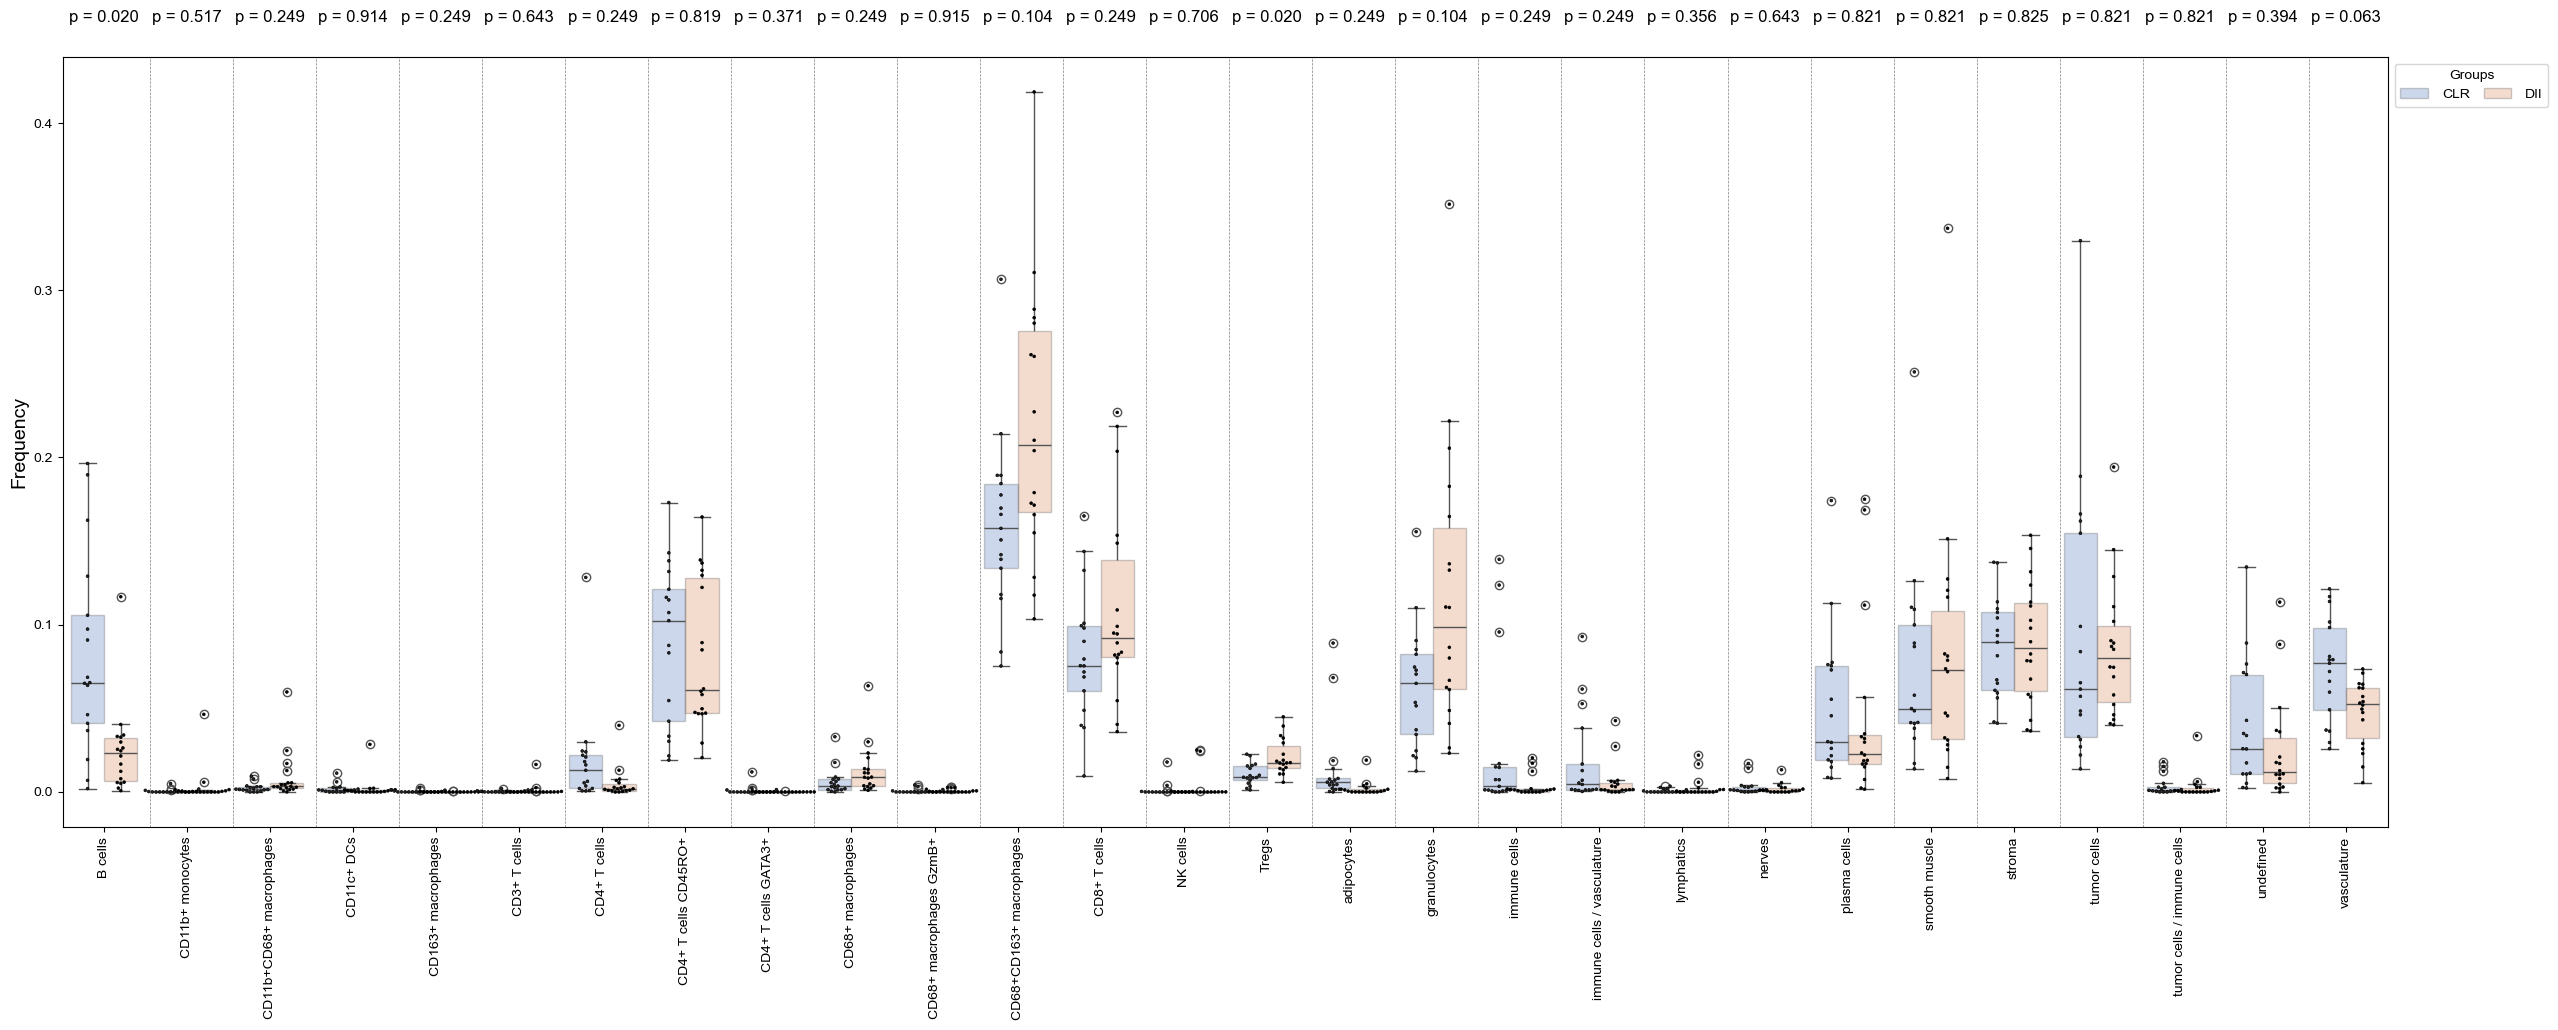

In [24]:
# Perform t-tests
selected_cell_types = sorted(protein['ClusterName'].unique())
selected_p_values = []
for ct in selected_cell_types:
    group1 = spot_cellfreq_df_melt[(spot_cellfreq_df_melt['ClusterName'] == ct) & (spot_cellfreq_df_melt['Condition'] == 'CLR')]['Frequency']
    group2 = spot_cellfreq_df_melt[(spot_cellfreq_df_melt['ClusterName'] == ct) & (spot_cellfreq_df_melt['Condition'] == 'DII')]['Frequency']
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value of {p_value}")
    selected_p_values.append(p_value)

pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')
print('-'*42)
print(f"p-values after correction:")

# Plot
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=spot_cellfreq_df_melt, x='ClusterName', y='Frequency', hue='Condition', palette='muted', boxprops=dict(alpha=.3), ax=ax, dodge=True, order=selected_cell_types)
sns.swarmplot(data=spot_cellfreq_df_melt, x='ClusterName', y='Frequency', hue='Condition', palette='dark:black', size=2.0, dodge=True, order=selected_cell_types, ax=ax, edgecolor='auto', linewidth=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)
plt.xticks(rotation=90)

p_vals_corrected_dict = {}
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=12, rotation=0)
    print(f"{ct} has p value = {pvals_corrected[i]:.3f}", flush=True)
    p_vals_corrected_dict[ct] = pvals_corrected[i]
    
for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)
    
ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('') 
plt.show()

### Process Cell Co-Occurrence Dataframe

In [25]:
union_cols = set(global_co_occurrence_subcols).union(set(spot_co_occurrence_subcols))
print(len(union_cols))

64


In [26]:
# Make them have the same set of columns
global_co_occurrence_df = global_co_occurrence_df.reindex(columns=union_cols).fillna(0)
spot_co_occurrence_df = spot_co_occurrence_df.reindex(columns=union_cols).fillna(0)

In [47]:
# Global Cell Co-Occurrence 
# Multi-index to single-index column
new_columns = []
for col in global_co_occurrence_df.columns:
    if isinstance(col, tuple):  # This checks if the column is a MultiIndex
        # Join only if the column name is not 'Mouse' or 'Condition'
        if "Patients" not in col and "Condition" not in col:
            new_columns.append('&'.join(map(str, col)).strip())
        else:
            # If 'Mouse' or 'Condition' is in the column, it is not joined with '&'
            new_columns.append(col[0])
    else:
        new_columns.append(col)

global_co_occurrence_df_single = global_co_occurrence_df.copy()
global_co_occurrence_df_single.columns = new_columns
global_co_occurrence_df_single = global_co_occurrence_df_single[[col for col in global_co_occurrence_df_single.columns]]

# Melt the DataFrame
global_co_occurrence_melted = global_co_occurrence_df_single.melt(id_vars=['Patients', 'Condition'], var_name='Cell Combination', value_name='Frequency')
global_co_occurrence_melted

,Patients,Condition,Cell Combination,Frequency
0,1,1,smooth muscle&undefined,0.000000
1,1,1,smooth muscle&undefined,0.003953
2,1,1,smooth muscle&undefined,0.007233
3,1,1,smooth muscle&undefined,0.000000
4,2,2,smooth muscle&undefined,0.000000
...,...,...,...,...
8675,34,1,CD8+ T cells&Tregs,0.005362
8676,35,1,CD8+ T cells&Tregs,0.000000
8677,35,1,CD8+ T cells&Tregs,0.000000
8678,35,1,CD8+ T cells&Tregs,0.000000


In [48]:
global_co_occurrence_melted_avg = global_co_occurrence_melted.groupby(by=['Patients', 'Cell Combination', 'Condition'])['Frequency'].mean().reset_index()
global_co_occurrence_melted_avg['Condition'] = global_co_occurrence_melted_avg['Condition'].map(condition_num2str)
global_co_occurrence_melted_avg

,Patients,Cell Combination,Condition,Frequency
0,1,B cells&CD4+ T cells,CLR,0.003656
1,1,B cells&CD4+ T cells CD45RO+,CLR,0.016910
2,1,B cells&CD68+CD163+ macrophages,CLR,0.008217
3,1,B cells&CD8+ T cells,CLR,0.012792
4,1,B cells&granulocytes,CLR,0.010500
...,...,...,...,...
2165,35,stroma&tumor cells,CLR,0.034694
2166,35,stroma&undefined,CLR,0.012952
2167,35,stroma&vasculature,CLR,0.013089
2168,35,tumor cells&undefined,CLR,0.018471


p-value before correction:
B cells&CD4+ T cells has p value = 0.059
B cells&CD4+ T cells CD45RO+ has p value = 0.002
B cells&CD68+CD163+ macrophages has p value = 0.099
B cells&CD8+ T cells has p value = 0.011
B cells&granulocytes has p value = 0.246
B cells&plasma cells has p value = 0.215
B cells&smooth muscle has p value = 0.310
B cells&stroma has p value = 0.197
B cells&tumor cells has p value = 0.032
B cells&vasculature has p value = 0.045
CD4+ T cells CD45RO+&CD68+CD163+ macrophages has p value = 0.175
CD4+ T cells CD45RO+&CD8+ T cells has p value = 0.794
CD4+ T cells CD45RO+&granulocytes has p value = 0.211
CD4+ T cells CD45RO+&plasma cells has p value = 0.828
CD4+ T cells CD45RO+&smooth muscle has p value = 0.120
CD4+ T cells CD45RO+&stroma has p value = 0.198
CD4+ T cells CD45RO+&tumor cells has p value = 0.582
CD4+ T cells CD45RO+&undefined has p value = 0.987
CD4+ T cells CD45RO+&vasculature has p value = 0.979
CD4+ T cells&CD4+ T cells CD45RO+ has p value = 0.034
CD4+ T cel

/var/folders/7g/phdhh_ld3dlbnrst0t60bwzr0000gn/T/ipykernel_91782/4205923182.py:22: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Condition', palette='dark:black', size=1.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)


------------------------------------------
p-values after correction:
B cells&CD4+ T cells has p value = 0.202
B cells&CD4+ T cells CD45RO+ has p value = 0.065
B cells&CD68+CD163+ macrophages has p value = 0.267
B cells&CD8+ T cells has p value = 0.092
B cells&granulocytes has p value = 0.401
B cells&plasma cells has p value = 0.387
B cells&smooth muscle has p value = 0.480
B cells&stroma has p value = 0.383
B cells&tumor cells has p value = 0.161
B cells&vasculature has p value = 0.177
CD4+ T cells CD45RO+&CD68+CD163+ macrophages has p value = 0.374
CD4+ T cells CD45RO+&CD8+ T cells has p value = 0.895
CD4+ T cells CD45RO+&granulocytes has p value = 0.387
CD4+ T cells CD45RO+&plasma cells has p value = 0.917
CD4+ T cells CD45RO+&smooth muscle has p value = 0.305
CD4+ T cells CD45RO+&stroma has p value = 0.383
CD4+ T cells CD45RO+&tumor cells has p value = 0.752
CD4+ T cells CD45RO+&undefined has p value = 0.987
CD4+ T cells CD45RO+&vasculature has p value = 0.987
CD4+ T cells&CD4+ T c

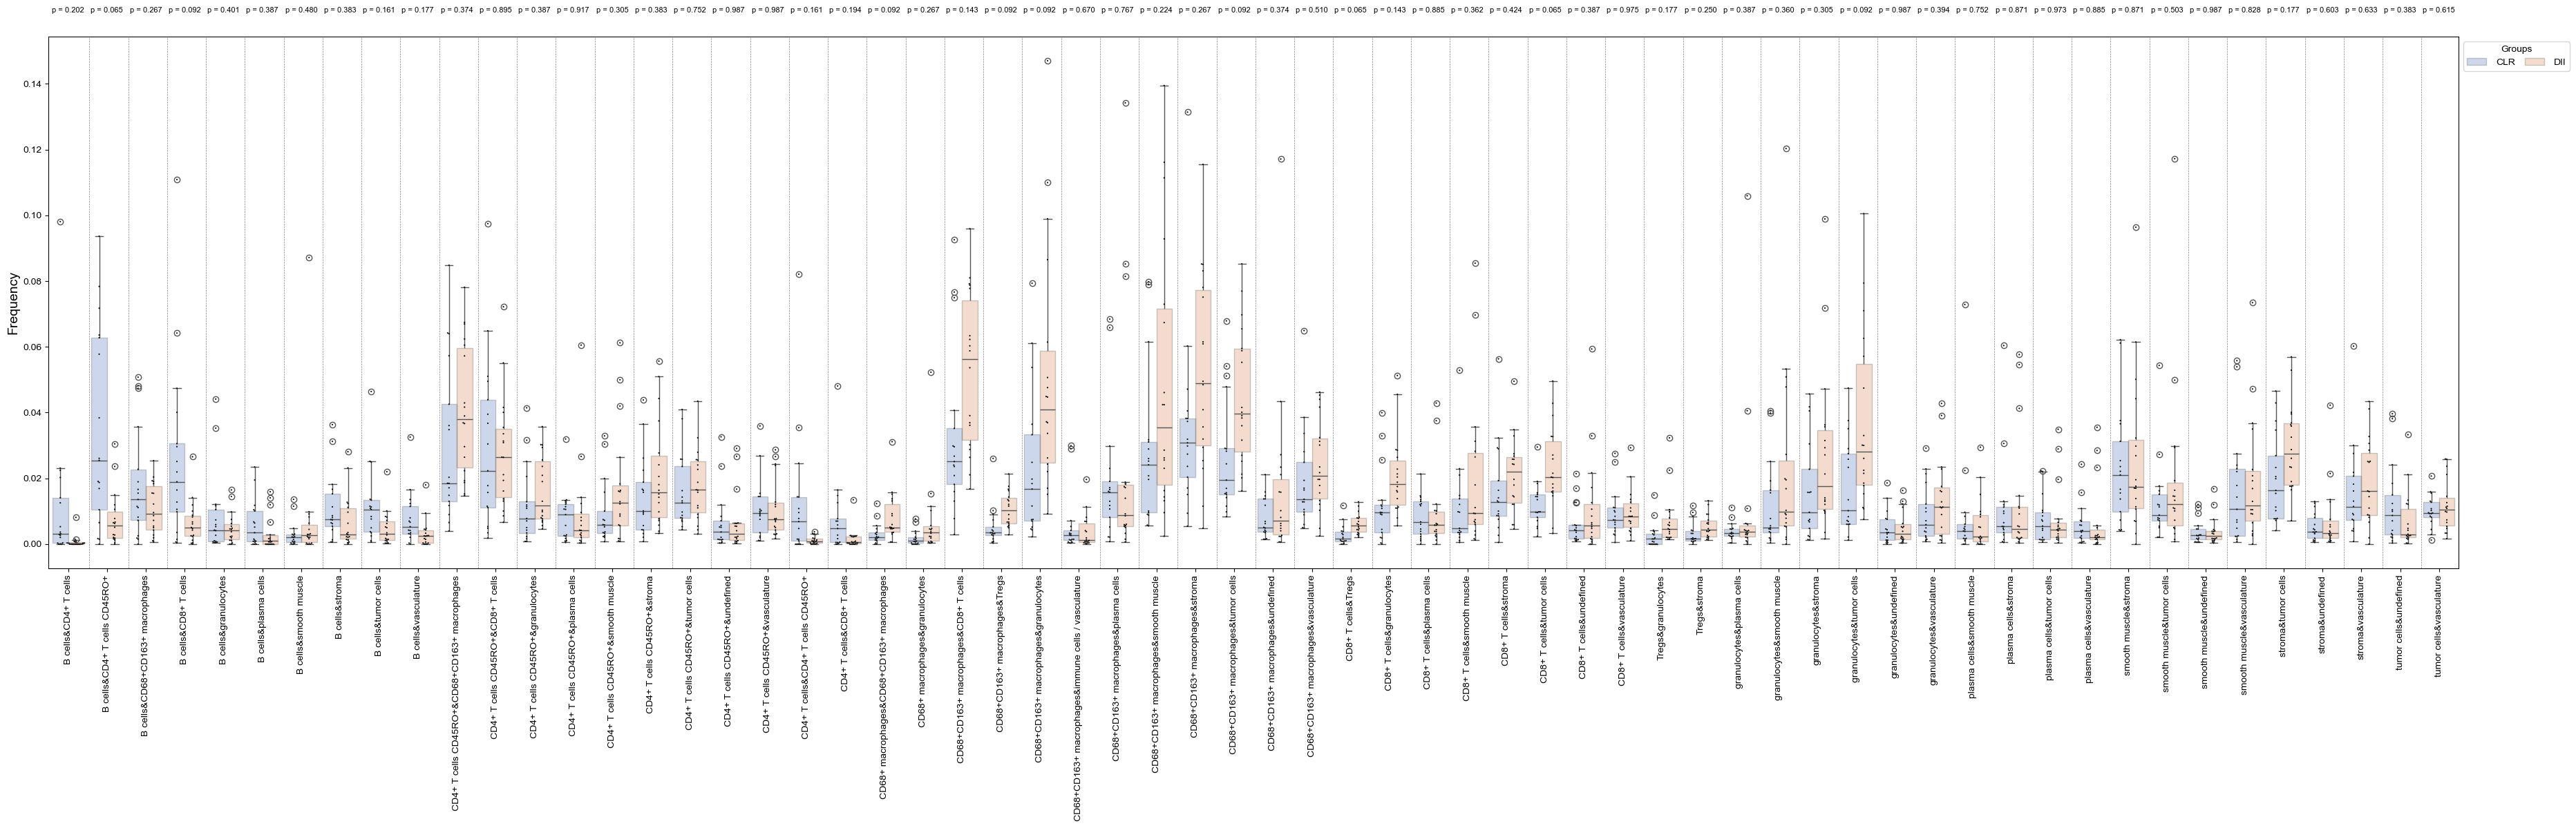

In [50]:
# Global Cell Co-Occurrence 
selected_cell_types = sorted(global_co_occurrence_melted_avg['Cell Combination'].unique())
selected_p_values = []

# Perform t-tests
print(f"p-value before correction:")
for ct in selected_cell_types:
    subset = global_co_occurrence_melted_avg[global_co_occurrence_melted_avg['Cell Combination'] == ct]
    group1 = subset[subset['Condition'] == 'CLR']['Frequency']
    group2 = subset[subset['Condition'] == 'DII']['Frequency']

    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value = {p_value:.3f}")
    selected_p_values.append(p_value)

# Filter the dataframe based on selected Cell Combinations
df_filtered = global_co_occurrence_melted_avg[global_co_occurrence_melted_avg['Cell Combination'].isin(selected_cell_types)]

# Plot the filtered data
fig, ax = plt.subplots(figsize=(45,10))
sns.boxplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Condition', palette='muted', boxprops=dict(alpha=.3), ax=ax, dodge=True,order=selected_cell_types)
sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Condition', palette='dark:black', size=1.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)

pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')

print('-'*42)
print(f"p-values after correction:")

p_vals_corrected_dict = {}
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=8, rotation=0)
    print(f"{ct} has p value = {pvals_corrected[i]:.3f}", flush=True)
    p_vals_corrected_dict[ct] = pvals_corrected[i]
    
for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)
    
ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')   
plt.xticks(rotation=90)  
plt.show()

In [52]:
# Spot Cell Co-Occurrence
# Multi-index to single-index column
new_columns = []
for col in spot_co_occurrence_df.columns:
    if isinstance(col, tuple):  # This checks if the column is a MultiIndex
        # Join only if the column name is not 'Mouse' or 'Condition'
        if "Patients" not in col and "Condition" not in col:
            new_columns.append('&'.join(map(str, col)).strip())
        else:
            # If 'Mouse' or 'Condition' is in the column, it is not joined with '&'
            new_columns.append(col[0])
    else:
        new_columns.append(col)

spot_co_occurrence_df_single = spot_co_occurrence_df.copy()
spot_co_occurrence_df_single.columns = new_columns
spot_co_occurrence_df_single = spot_co_occurrence_df_single[[col for col in spot_co_occurrence_df_single.columns]]

# Melt the DataFrame
spot_co_occurrence_melted = spot_co_occurrence_df_single.melt(id_vars=['Patients', 'Condition'], var_name='Cell Combination', value_name='Frequency')

In [53]:
spot_co_occurrence_melted_avg = spot_co_occurrence_melted.groupby(by=['Patients', 'Cell Combination', 'Condition'])['Frequency'].mean().reset_index()
spot_co_occurrence_melted_avg['Condition'] = spot_co_occurrence_melted_avg['Condition'].map(condition_num2str)
spot_co_occurrence_melted_avg

,Patients,Cell Combination,Condition,Frequency
0,1,B cells&CD4+ T cells,CLR,0.019231
1,1,B cells&CD4+ T cells CD45RO+,CLR,0.081731
2,1,B cells&CD68+CD163+ macrophages,CLR,0.030343
3,1,B cells&CD8+ T cells,CLR,0.066401
4,1,B cells&granulocytes,CLR,0.057587
...,...,...,...,...
2165,35,stroma&tumor cells,CLR,0.047035
2166,35,stroma&undefined,CLR,0.013996
2167,35,stroma&vasculature,CLR,0.054859
2168,35,tumor cells&undefined,CLR,0.009375


p-value before correction: 
B cells&CD4+ T cells has p value = 0.045
B cells&CD4+ T cells CD45RO+ has p value = 0.001
B cells&CD68+CD163+ macrophages has p value = 0.073
B cells&CD8+ T cells has p value = 0.005
B cells&granulocytes has p value = 0.130
B cells&plasma cells has p value = 0.165
B cells&smooth muscle has p value = 0.260
B cells&stroma has p value = 0.114
B cells&tumor cells has p value = 0.027
B cells&vasculature has p value = 0.032
CD4+ T cells CD45RO+&CD68+CD163+ macrophages has p value = 0.237
CD4+ T cells CD45RO+&CD8+ T cells has p value = 0.893
CD4+ T cells CD45RO+&granulocytes has p value = 0.181
CD4+ T cells CD45RO+&plasma cells has p value = 0.585
CD4+ T cells CD45RO+&smooth muscle has p value = 0.085
CD4+ T cells CD45RO+&stroma has p value = 0.245
CD4+ T cells CD45RO+&tumor cells has p value = 0.732
CD4+ T cells CD45RO+&undefined has p value = 0.928
CD4+ T cells CD45RO+&vasculature has p value = 0.524
CD4+ T cells&CD4+ T cells CD45RO+ has p value = 0.021
CD4+ T ce

/var/folders/7g/phdhh_ld3dlbnrst0t60bwzr0000gn/T/ipykernel_91782/2632425307.py:22: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Condition', palette='dark:black', size=2.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)
/opt/miniconda3/envs/mesa/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


------------------------------------------
p-values after correction:
B cells&CD4+ T cells in hot spots has p value = 0.175
B cells&CD4+ T cells CD45RO+ in hot spots has p value = 0.018
B cells&CD4+ T cells CD45RO+ in whole tissue has p value = 0.065
******************************************
B cells&CD68+CD163+ macrophages in hot spots has p value = 0.239
B cells&CD8+ T cells in hot spots has p value = 0.057
B cells&granulocytes in hot spots has p value = 0.309
B cells&plasma cells in hot spots has p value = 0.351
B cells&smooth muscle in hot spots has p value = 0.460
B cells&stroma in hot spots has p value = 0.297
B cells&tumor cells in hot spots has p value = 0.136
B cells&vasculature in hot spots has p value = 0.141
CD4+ T cells CD45RO+&CD68+CD163+ macrophages in hot spots has p value = 0.446
CD4+ T cells CD45RO+&CD8+ T cells in hot spots has p value = 0.938
CD4+ T cells CD45RO+&granulocytes in hot spots has p value = 0.363
CD4+ T cells CD45RO+&plasma cells in hot spots has p value

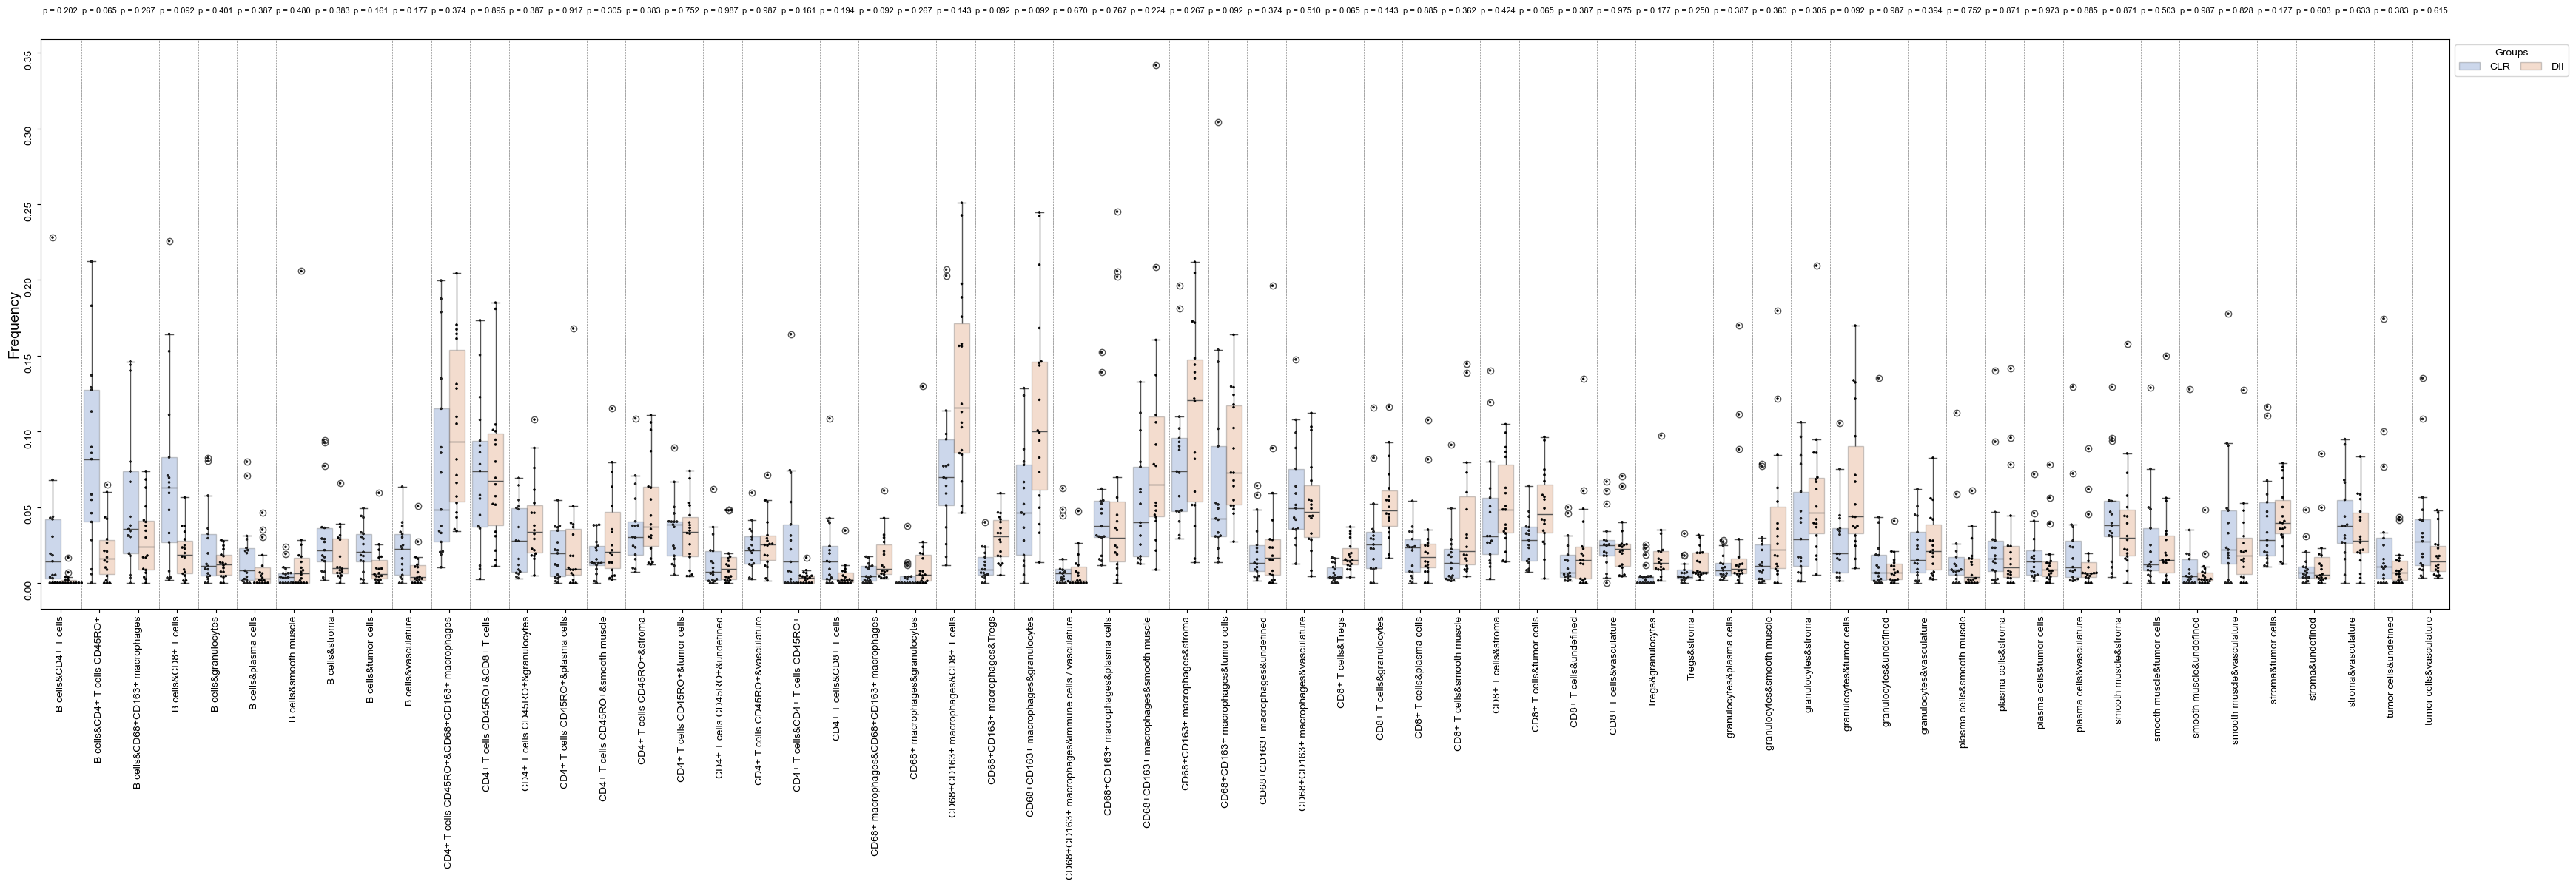

In [54]:
# Spot Cell Co-Occurrence    
selected_cell_types = sorted(spot_co_occurrence_melted_avg['Cell Combination'].unique())
selected_p_values = []

# Perform t-tests
print(f"p-value before correction: ")
for ct in selected_cell_types: # df_melted['CellType'].unique():
    subset = spot_co_occurrence_melted_avg[spot_co_occurrence_melted_avg['Cell Combination'] == ct]
    group1 = subset[subset['Condition'] == 'CLR']['Frequency']
    group2 = subset[subset['Condition'] == 'DII']['Frequency']

    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"{ct} has p value = {p_value:.3f}")
    selected_p_values.append(p_value)

# Filter the dataframe based on selected CellTypes
df_filtered = spot_co_occurrence_melted_avg[spot_co_occurrence_melted_avg['Cell Combination'].isin(selected_cell_types)]

# Plot the filtered data
fig, ax = plt.subplots(figsize=(42,10))
sns.boxplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Condition', palette='muted', boxprops=dict(alpha=.3), ax=ax, dodge=True,order=selected_cell_types)
sns.swarmplot(data=df_filtered, x='Cell Combination', y='Frequency', hue='Condition', palette='dark:black', size=2.0, dodge=True,order=selected_cell_types, ax=ax, edgecolor='gray', linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Groups", handletextpad=1, columnspacing=1, bbox_to_anchor=(1, 1), ncol=3, frameon=True)

hot_pvals_corrected = stats.false_discovery_control(selected_p_values, method='bh')

print('-'*42)
print(f"p-values after correction:")

highlighted_comb = []
yrange = ax.get_ylim()[1] - ax.get_ylim()[0]
for i, ct in enumerate(selected_cell_types):
    ax.text(i, yrange, f"p = {pvals_corrected[i]:.3f}", ha='center', fontsize=8, rotation=0)
    print(f"{ct} in hot spots has p value = {hot_pvals_corrected[i]:.3f}", flush=True)
    if hot_pvals_corrected[i] < 0.05 and p_vals_corrected_dict[ct] >= 0.05:
        highlighted_comb.append(tuple(map(str.strip, ct.split('&'))))
        print(f"{ct} in whole tissue has p value = {p_vals_corrected_dict[ct]:.3f}", flush=True)
        print('*'*42)
    
for i in range(len(selected_cell_types) - 1):
    ax.axvline(i + 0.55, color='grey', linestyle='--', linewidth=0.5)
    
ax.set_ylabel("Frequency", fontsize=14)
ax.set_xlabel('')   
plt.xticks(rotation=90)  
plt.yticks(rotation=90)  
plt.show()

### Cell Co-Occurrence Circle Plot

In [55]:
circoplot_df1 = global_co_occurrence_df.sort_index(axis=1, level=[0,1]).drop(columns=['Patients'])
circoplot_df1['Condition'] = circoplot_df1['Condition'].map(condition_num2str)
circoplot_df1 = circoplot_df1[[col for col in circoplot_df1.columns if 'undefined' not in col]]
# Group by 'Condition' and calculate the mean of the other columns
circoplot_df1 = circoplot_df1.groupby('Condition').mean().reset_index()
circoplot_df1 = circoplot_df1.set_index('Condition')
circoplot_df1

B cells                                               \
          CD4+ T cells CD4+ T cells CD45RO+ CD68+CD163+ macrophages   
Condition                                                             
CLR           0.012412             0.034873                0.018433   
DII           0.000752             0.007611                0.010686   

                                                                          \
          CD8+ T cells granulocytes plasma cells smooth muscle    stroma   
Condition                                                                  
CLR           0.026145     0.008671     0.006010      0.002917  0.010934   
DII           0.006457     0.004830     0.003341      0.007947  0.006856   

                                   ...  plasma cells                        \
          tumor cells vasculature  ... smooth muscle    stroma tumor cells   
Condition                          ...                                       
CLR          0.011779    0.007876  ...      0.008861  0.010709    0.007356   
DII          0.004796    0.003272  ...      0.006270  0.012660    0.007738   

                      smooth muscle                              stroma  \
          vasculature        stroma tumor cells vasculature tumor cells   
Condition                                                                 
CLR          0.005696      0.023346    0.012941    0.016308    0.020004   
DII          0.006562      0.025861    0.019929    0.018927    0.029355   

                      tumor cells  
          vasculature vasculature  
Condition                          
CLR          0.015639    0.009926  
DII          0.019093    0.011639  

[2 rows x 55 columns]

In [56]:
circoplot_df2 = global_cellfreq_df.drop(columns=['undefined'])
circoplot_df2['Condition'] = circoplot_df2['Condition'].map(condition_num2str)
# Group by 'Condition' and calculate the mean of the other columns
circoplot_df2 = circoplot_df2.groupby('Condition').mean().reset_index()
circoplot_df2 = circoplot_df2.set_index('Condition')
circoplot_df2

ClusterName,B cells,CD11b+ monocytes,CD11b+CD68+ macrophages,CD11c+ DCs,CD163+ macrophages,CD3+ T cells,CD4+ T cells,CD4+ T cells CD45RO+,CD4+ T cells GATA3+,CD68+ macrophages,...,immune cells / vasculature,lymphatics,nerves,plasma cells,smooth muscle,stroma,tumor cells,tumor cells / immune cells,vasculature,Patients
Condition,,,,,,,,,,,,,,,,,,,,,
CLR,0.069471,0.000281,0.001505,0.001385,0.000363,0.000272,0.012074,0.072276,0.000508,0.004358,...,0.016573,0.000356,0.002579,0.038024,0.104830,0.091609,0.166579,0.003786,0.054342,20.294118
DII,0.016478,0.004673,0.007303,0.001686,0.000082,0.000911,0.003185,0.065721,0.000022,0.011092,...,0.007733,0.001711,0.002704,0.029154,0.112189,0.078978,0.189360,0.007580,0.042994,15.833333


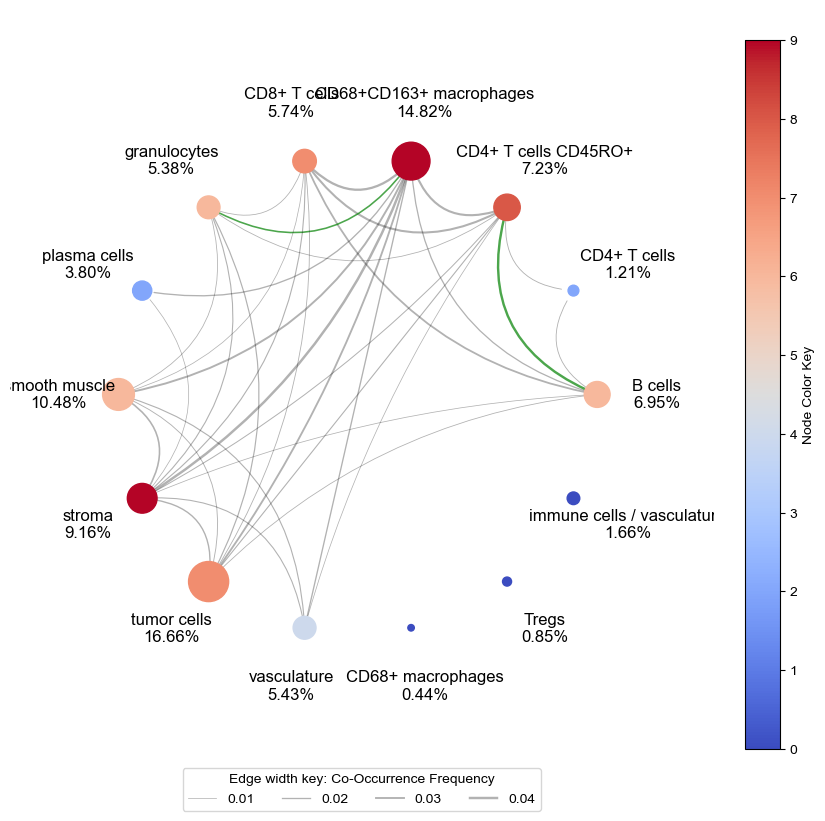

In [59]:
patient_group = 'CLR'
eco.create_circos_plot(circoplot_df1.loc[[patient_group]], 
                       cell_type_colors_hex=None,
                       cell_abundance=circoplot_df2.loc[[patient_group]],
                       threshold=0.01, 
                       edge_weights_scaler=50,
                       highlighted_edges=highlighted_comb,
                       node_weights_scaler=5000,
                       figure_size=(8,8),
                       save_path=None)